In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

VIN (1-10)     County       City State  Postal Code  Model Year   Make   
0  5YJ3E1EB4L     Yakima     Yakima    WA      98908.0        2020  TESLA  \
1  5YJ3E1EA7K  San Diego  San Diego    CA      92101.0        2019  TESLA   
2  7JRBR0FL9M       Lane     Eugene    OR      97404.0        2021  VOLVO   
3  5YJXCBE21K     Yakima     Yakima    WA      98908.0        2019  TESLA   
4  5UXKT0C5XH  Snohomish    Bothell    WA      98021.0        2017    BMW   

     Model                   Electric Vehicle Type   
0  MODEL 3          Battery Electric Vehicle (BEV)  \
1  MODEL 3          Battery Electric Vehicle (BEV)   
2      S60  Plug-in Hybrid Electric Vehicle (PHEV)   
3  MODEL X          Battery Electric Vehicle (BEV)   
4       X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range   
0           Clean Alternative Fuel Vehicle Eligible             322  \
1           Clean Alternative Fuel Vehicle Eligible             220   
2             Not eligible due to low battery range              22   
3           Clean Alternative Fuel Vehicle Eligible             289   
4             Not eligible due to low battery range              14   

   Base MSRP  Legislative District  DOL Vehicle ID   
0          0                  14.0       127175366  \
1          0                   NaN       266614659   
2          0                   NaN       144502018   
3          0                  14.0       477039944   
4          0                   1.0       106314946   

              Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-120.56916 46.58514)              PACIFICORP       5.307700e+10  
1  POINT (-117.16171 32.71568)                     NaN       6.073005e+09  
2  POINT (-123.12802 44.09573)                     NaN       4.103900e+10  
3  POINT (-120.56916 46.58514)              PACIFICORP       5.307700e+10  
4   POINT (-122.18384 47.8031)  PUGET SOUND ENERGY INC       5.306105e+10

In [4]:
df.tail()

VIN (1-10)     County         City State  Postal Code  Model Year   
124711  5YJ3E1EB6N  Snohomish       Monroe    WA      98272.0        2022  \
124712  KNDCM3LD2L     Pierce       Tacoma    WA      98406.0        2020   
124713  7SAYGDEE0P    Whatcom   Bellingham    WA      98226.0        2023   
124714  1G1FW6S03J     Pierce       Tacoma    WA      98444.0        2018   
124715  1G1RC6E47F     Benton  Benton City    WA      99320.0        2015   

             Make    Model                   Electric Vehicle Type   
124711      TESLA  MODEL 3          Battery Electric Vehicle (BEV)  \
124712        KIA     NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
124713      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
124714  CHEVROLET  BOLT EV          Battery Electric Vehicle (BEV)   
124715  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range   
124711  Eligibility unknown as battery range has not b...               0  \
124712              Not eligible due to low battery range              26   
124713  Eligibility unknown as battery range has not b...               0   
124714            Clean Alternative Fuel Vehicle Eligible             238   
124715            Clean Alternative Fuel Vehicle Eligible              38   

        Base MSRP  Legislative District  DOL Vehicle ID   
124711          0                  39.0       192999061  \
124712          0                  27.0       113346250   
124713          0                  42.0       232751305   
124714          0                  29.0       102589007   
124715          0                  16.0       476974718   

                   Vehicle Location   
124711   POINT (-121.98087 47.8526)  \
124712  POINT (-122.52054 47.26887)   
124713   POINT (-122.49756 48.7999)   
124714  POINT (-122.46495 47.16778)   
124715  POINT (-119.48756 46.26543)   

                                         Electric Utility  2020 Census Tract  
124711                             PUGET SOUND ENERGY INC       5.306105e+10  
124712  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...       5.305306e+10  
124713  PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...       5.307300e+10  
124714  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...       5.305307e+10  
124715  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...       5.300501e+10

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

In [6]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP   
count  124714.000000  124716.000000   124716.000000  124716.000000  \
mean    98163.826740    2019.406339       79.471936    1556.068909   
std      2550.122515       2.976174      100.331969   10053.289929   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98121.000000    2020.000000       25.000000       0.000000   
75%     98370.000000    2022.000000      200.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         124419.000000    1.247160e+05       1.247140e+05  
mean              29.664481    2.040790e+08       5.297079e+10  
std               14.749518    8.882569e+07       1.652363e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.541015e+08       5.303301e+10  
50%               34.000000    1.995558e+08       5.303303e+10  
75%               43.000000    2.275165e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [7]:
df.drop(['VIN (1-10)','Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1,inplace=True)

In [8]:
df.head()

County       City State  Model Year   Make    Model   
0     Yakima     Yakima    WA        2020  TESLA  MODEL 3  \
1  San Diego  San Diego    CA        2019  TESLA  MODEL 3   
2       Lane     Eugene    OR        2021  VOLVO      S60   
3     Yakima     Yakima    WA        2019  TESLA  MODEL X   
4  Snohomish    Bothell    WA        2017    BMW       X5   

                    Electric Vehicle Type   
0          Battery Electric Vehicle (BEV)  \
1          Battery Electric Vehicle (BEV)   
2  Plug-in Hybrid Electric Vehicle (PHEV)   
3          Battery Electric Vehicle (BEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range   
0           Clean Alternative Fuel Vehicle Eligible             322  \
1           Clean Alternative Fuel Vehicle Eligible             220   
2             Not eligible due to low battery range              22   
3           Clean Alternative Fuel Vehicle Eligible             289   
4             Not eligible due to low battery range              14   

              Vehicle Location  
0  POINT (-120.56916 46.58514)  
1  POINT (-117.16171 32.71568)  
2  POINT (-123.12802 44.09573)  
3  POINT (-120.56916 46.58514)  
4   POINT (-122.18384 47.8031)

In [9]:
df = df.dropna()

In [10]:
Counties = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Counties)[:10],y=values[:10],labels={'x':"County Name",'y':"Number of Cars"},color=values[:10])

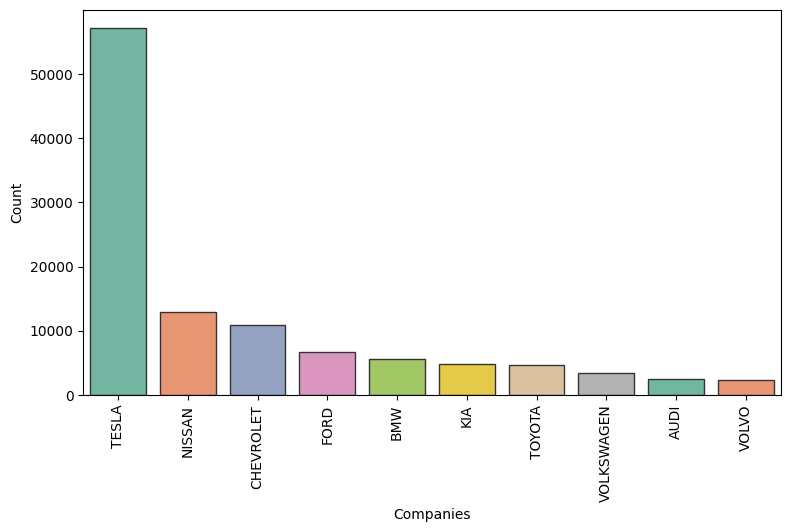

In [15]:
#lets see which company makes most of the electric vehicles
Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [16]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

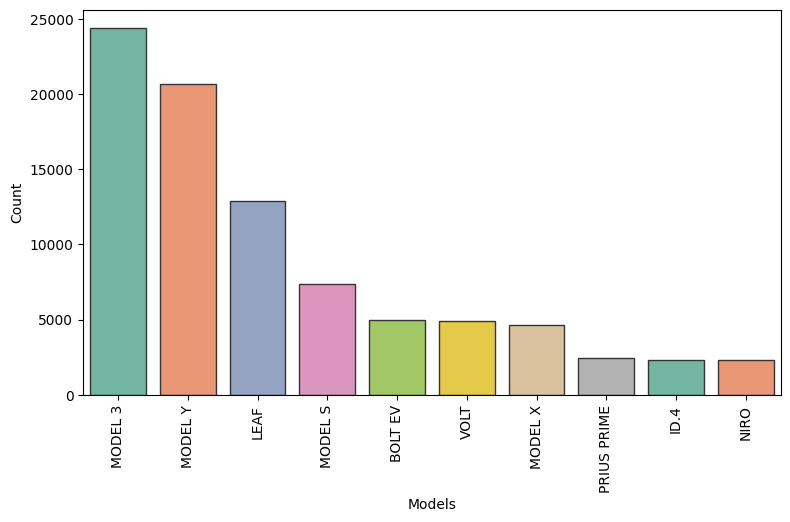

In [18]:
#Top 10 models in use

Models = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [19]:
#what are the most sold models per each company
#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL 3
Top selling model for NISSAN is -----------> LEAF
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for FORD is -----------> MUSTANG MACH-E
Top selling model for BMW is -----------> I3
Top selling model for KIA is -----------> NIRO
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for AUDI is -----------> E-TRON
Top selling model for VOLVO is -----------> XC90


In [20]:
#Percentage of BEV vs PHEV

Vehicle_type = list(df.groupby('Electric Vehicle Type').count()['County'].index)
values = df.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)


In [21]:
#lets see whats the percentage of top 10 companies vehicles are BEV and PHEV

for index,i in enumerate(top_10_companies):
    data = df[df['Make']==i]
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index)
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

<Axes: xlabel='Electric Range', ylabel='Count'>

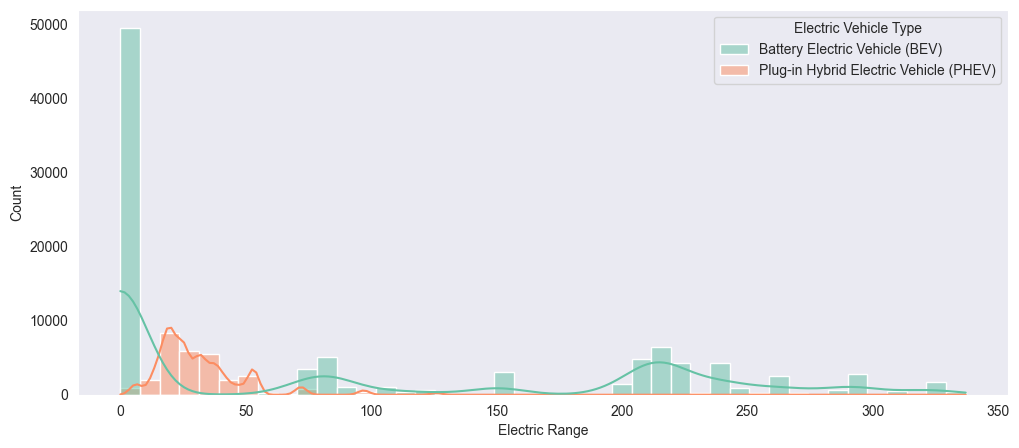

In [22]:
#lets see the electric range difference between PHEV and BEV
plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x = 'Electric Range',data=df,kde=True,hue='Electric Vehicle Type',palette='Set2')

##### the data shows that BEVs will give more range but there are some vehicles which give almost 0 range on PHEV

In [23]:
df[df['Electric Range']==0].shape

(49493, 10)

C:\Users\Goolean\AppData\Local\Temp\ipykernel_17888\3654208490.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

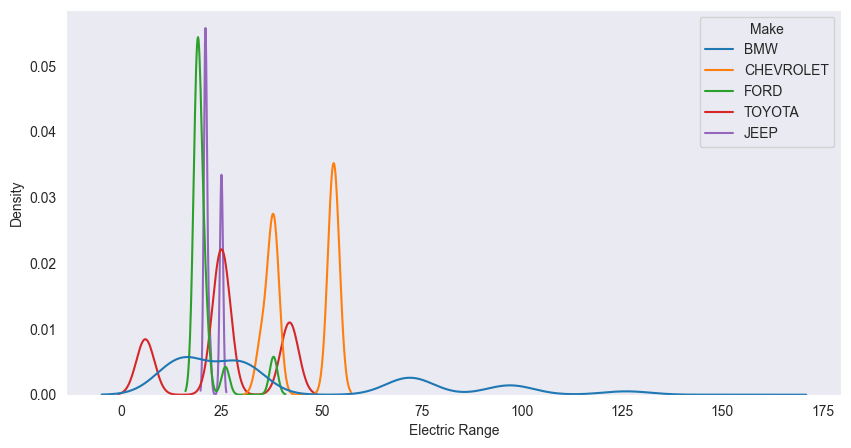

In [24]:
#lets filter out top 5 companies as per each electric vehicle type

#PHEV

data_phev = df[df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(data_phev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_phev['phe'] = data_phev['Make'].apply(lambda x:1 if x in companies else 0 )
data_phev = data_phev[data_phev['phe']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=data_phev)

C:\Users\Goolean\AppData\Local\Temp\ipykernel_17888\2626622709.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

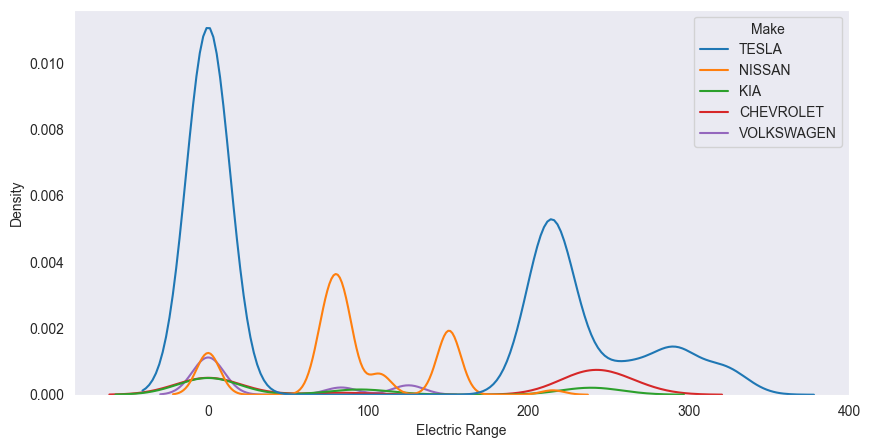

In [25]:
#BEV


data_bev = df[df['Electric Vehicle Type']!='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(data_bev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_bev['bev'] = data_bev['Make'].apply(lambda x:1 if x in companies else 0 )
data_bev = data_bev[data_bev['bev']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=data_bev)

##### if we remove zero ranges we can see CHEVERLET AND TESLA offering high ranges

##### lets see top20 most sold cars and top20 most range giving vehicles and check if there is any correlation

In [26]:
top_10_vehicles = list(df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]

In [27]:
top_10_range =  df.sort_values(by='Electric Range',ascending=False)['Model'].unique()[:10]

In [28]:
top_10_vehicles

['MODEL 3',
 'MODEL Y',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'VOLT',
 'MODEL X',
 'PRIUS PRIME',
 'ID.4',
 'NIRO']

In [29]:
top_10_range

array(['MODEL S', 'MODEL 3', 'MODEL X', 'MODEL Y', 'BOLT EV', 'KONA',
       'ROADSTER', 'NIRO', 'I-PACE', 'PS2'], dtype=object)

##### 6 out of top 10 most selling ones are in the top_10 electric range vehicles so range can be a reason of their sales

<Axes: xlabel='Model Year', ylabel='count'>

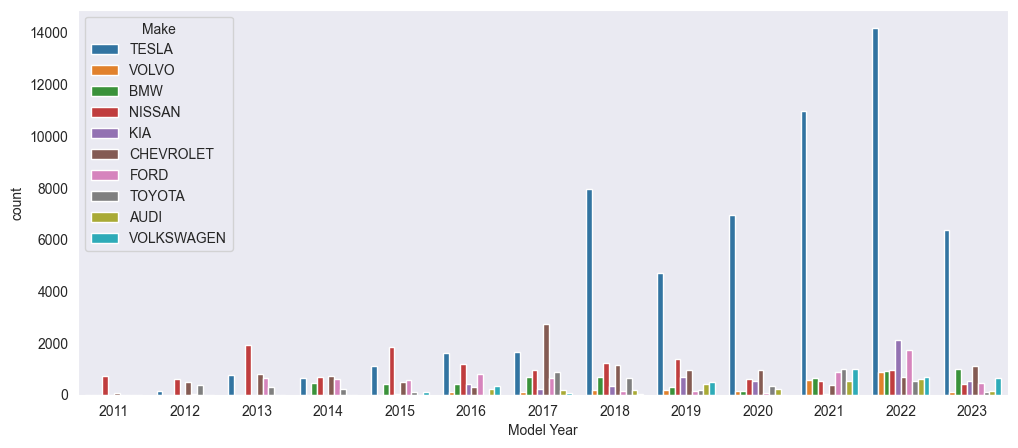

In [31]:
#Number of models of company for each year for last 10 years
#lets consider top_10 companies only

data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model Year']>=2011]
plt.figure(figsize=(12,5))
sns.countplot(x = 'Model Year',hue='Make',data=data)

##### earlier NISSAN and CHEVY used to have hold of the market then TESLA took over it 

In [33]:
#if we study an individual company TESLA
#1.which state is having more number of TESLA vehicles
#2.Model of which year is in use the most from TESLA

data_TESLA = df[df['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]

<Axes: >

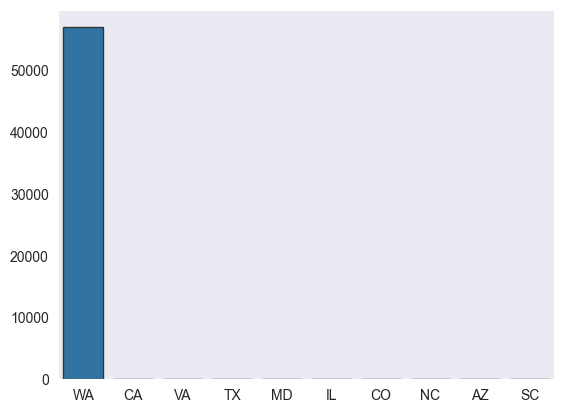

In [34]:
sns.barplot(x = top_10_states_TESLA,y=values,edgecolor='.2')

In [35]:
values

[56979, 42, 16, 12, 11, 5, 4, 4, 4, 4]

##### Most of the Tesla vehicles are from 'WA' state

<Axes: >

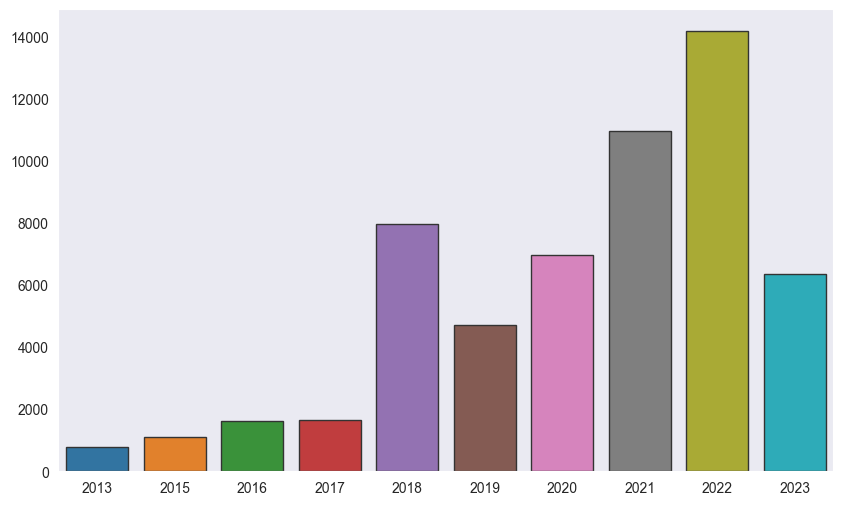

In [36]:
plt.figure(figsize=(10,6))
top_10_year_TESLA = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2')

##### most models are from 2022 which are sold by tesla

(20.0, 60.0)

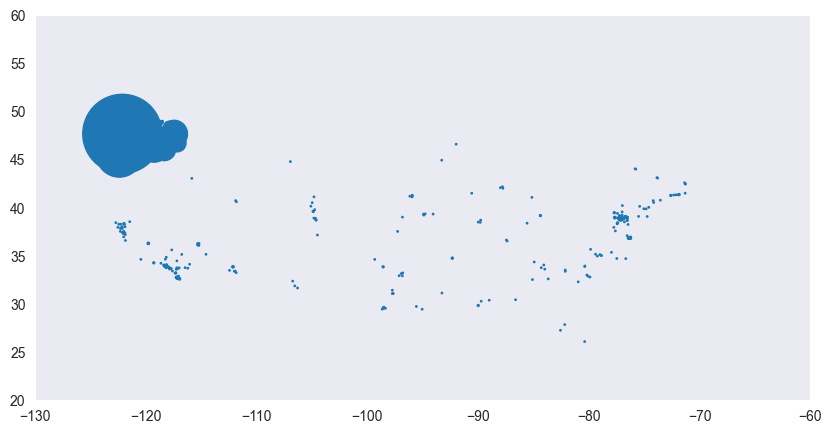

In [37]:
locations = list(df.groupby('Vehicle Location').count()['County'].index)
values = list(df.groupby('Vehicle Location').count()['County'].values)
Location_data = pd.DataFrame({'Locations':locations,'Count':values})
Location_data['Lattitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[1][1:]))
Location_data['Longitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[2][:-1]))

plt.figure(figsize=(10,5))
plt.scatter(x = Location_data['Lattitude'],y = Location_data['Longitude'],s=Location_data['Count'])
plt.xlim(-130,-60)
plt.ylim(20,60)

##### Most data points are from 'WA' state

In [38]:
df['Lattitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[1][1:]))
df['Longitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[2][:-1]))

(20.0, 50.0)

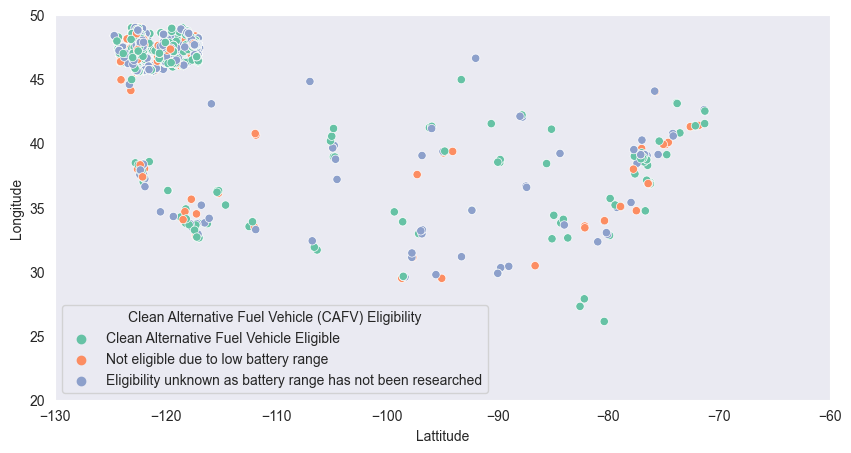

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility',palette='Set2')
plt.xlim(-130,-60)
plt.ylim(20,50)

##### density is more at certain regions of the map and distribution of CAFV can be seen

(20.0, 50.0)

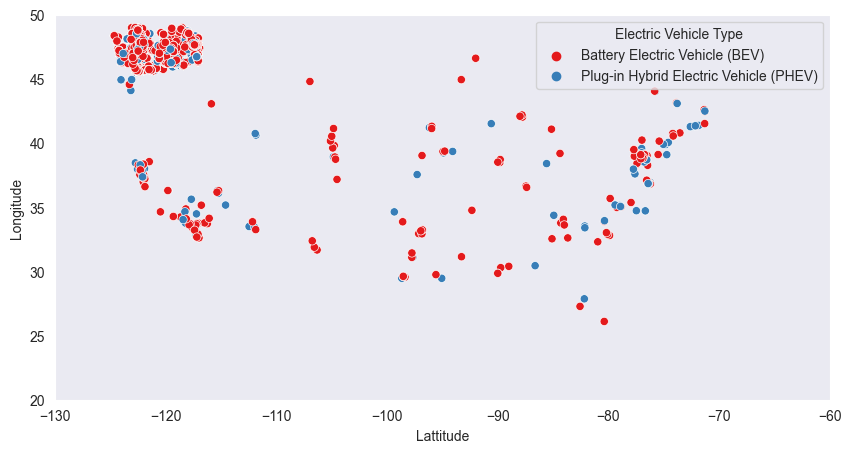

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Electric Vehicle Type',palette='Set1')
plt.xlim(-130,-60)
plt.ylim(20,50)

In [41]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [42]:
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])

In [43]:
data = data.reset_index()


In [44]:
data.columns = ['State','Count']

In [45]:
fig = px.choropleth(data,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Count',
                    color_continuous_scale="greens", 
                    scope="usa")

fig.show()